<a href="https://colab.research.google.com/github/KarltonBotics/MNA-IA-Equipos51/blob/main/Arboldedecision_Equipo51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Maestría en Inteligencia Artificial Aplicada** </center>
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
### **Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Carlos Enríquez Gorgonio A01793102
*   Fernando Ramírez Gómez A01298109
*   Francisco Javier Ramírez Arias A01316379
*   Jessica Lechuga Ramos A01793512
*   Moisés Rangel Silva A00143704


Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados en semanas pasadas. El asignar un crédito sabemos que conlleva un riesgo para el prestamista en caso de que el deudor no  pague al final la cantidad asignada, o inclusive el equivocarnos al negarle el préstamo a alguien que sí era confiable. Durante décadas se ha tratado de resolver dicho problema desde muchas áreas del  conocimiento y en particular las técnicas de Aprendizaje Automático (Machine Learning) han brindado  y siguen proporcionando nuevas formas de enfrentar este problema.

No existen muchas bases de datos abiertas bien documentadas sobre este problema, sin embargo los  datos del archivo SouthGermanCredit.asc del South_German_Credit_Data_Set de la página de la UCI es una sobre la cual se hace mucha investigación en torno a minimizar el riesgo en la asignación de créditos. En esta tarea se trabajará con dichos datos y los puedes encontrar dentro del archivo zip de la siguiente liga:  https://archive.ics.uci.edu/ml/datasets/South+German+Credit.

En la página de la liga anterior también se encuentra el archivo codetable.txt en el archivo zip. Ahí puedes encontrar más información detallada sobre el significado y tipo de cada variable. 

Al menos en las siguientes ligas puedes encontrar mayor información de dichos datos: 
https://www.kaggle.com/competitions/south-german-credit-prediction/overview  
https://www.semanticscholar.org/paper/South-German-Credit-Data-Classification-Using-to-Religia-Pranoto/219c9968cfa2cbb802376cf88035fe5e664b4418  
https://ieeexplore.ieee.org/document/9239944  

Así, con base a datos históricos, el objetivo es predecir si una persona es clasificada como confiable a la asignación de un crédito, o no lo es. La variable de salida se llama “kredit”.  

### Descripción de los datos
* Number of Instances:  1000
* Number of Attributes german: 20 (7 numerical, 13 categorical)
* Number of Attributes german.numer: 24 (24 numerical)

* Attribute description

 * Attribute 1:  (qualitative) [status]
	- Status of existing checking account
    - A11 :      ... <    0 DM
	- A12 : 0 <= ... <  200 DM
	- A13 :      ... >= 200 DM /salary assignments for at least 1 year
    - A14 : no checking account

 * Attribute 2:  (numerical) [duration]
	- Duration in month

 * Attribute 3:  (qualitative) [credit_history]
	- Credit history
	- A30 : no credits taken/all credits paid back duly
    - A31 : all credits at this bank paid back duly
	- A32 : existing credits paid back duly till now
    - A33 : delay in paying off in the past
	- A34 : critical account/other credits existing (not at this bank)

 * Attribute 4:  (qualitative) [purpose]
	- Purpose
	- A40 : car (new)
	- A41 : car (used)
	- A42 : furniture/equipment
	- A43 : radio/television
	- A44 : domestic appliances
	- A45 : repairs
	- A46 : education
	- A47 : (vacation - does not exist?)
	- A48 : retraining
	- A49 : business
	- A410 : others

 * Attribute 5:  (numerical) [credit_amount]
	- Credit amount

 * Attibute 6:  (qualitative) [savings]
	- Savings account/bonds
	- A61 :          ... <  100 DM
	- A62 :   100 <= ... <  500 DM
	- A63 :   500 <= ... < 1000 DM
	- A64 :          .. >= 1000 DM
    - A65 :   unknown/ no savings account

 * Attribute 7:  (qualitative) [employment_duration]
	- Present employment since
	- A71 : unemployed
	- A72 :       ... < 1 year
	- A73 : 1  <= ... < 4 years  
	- A74 : 4  <= ... < 7 years
	- A75 :       .. >= 7 years

 * Attribute 8:  (numerical) [installment_rate]
	- Installment rate in percentage of disposable income

 * Attribute 9:  (qualitative) [personal_status_sex]
	- Personal status and sex
	- A91 : male   : divorced/separated
	- A92 : female : divorced/separated/married
    - A93 : male   : single
	- A94 : male   : married/widowed
	- A95 : female : single

 * Attribute 10: (qualitative) [other_debtors]
	- Other debtors / guarantors
	- A101 : none
	- A102 : co-applicant
	- A103 : guarantor

 * Attribute 11: (numerical) [present_residence]
	- Present residence since

 * Attribute 12: (qualitative) [property]
	- Property
	- A121 : real estate
	- A122 : if not A121 : building society savings agreement/life insurance
    - A123 : if not A121/A122 : car or other, not in attribute 6
	- A124 : unknown / no property

 * Attribute 13: (numerical) [age]
	- Age in years

 * Attribute 14: (qualitative) [other_installment_plans]
	- Other installment plans 
	- A141 : bank
	- A142 : stores
	- A143 : none

 * Attribute 15: (qualitative) [housing]
	- Housing
	- A151 : rent
	- A152 : own
	- A153 : for free

 * Attribute 16: (numerical) [number_credits]
    - Number of existing credits at this bank

 * Attribute 17: (qualitative) [job]
	- Job
	- A171 : unemployed / unskilled  - non-resident
	- A172 : unskilled - resident
	- A173 : skilled employee / official
	- A174 : management/ self-employed / highly qualified employee/ officer

 * Attribute 18: (numerical) [people_liable]
	- Number of people being liable to provide maintenance for

 * Attribute 19: (qualitative) [telephone]
	- Telephone
	- A191 : none
	- A192 : yes, registered under the customers name


 * Attribute 20: (qualitative) [foreign_worker]
	- foreign worker
	- A201 : yes
	- A202 : no

* Attribute 20: (qualitative) [credit_risk]
	- foreign worker
	- A201 : yes
	- A202 : no

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# sea agregó el acceso a estas librerías
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Considerar librería que añada archivos .asc o revisar si la pasndas tiene esa capacidad

## **Ejercicio 1** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

NOTA: Si lo deseas, puedes traducirlos y ponerlas en español. 

In [ ]:
#Ruta del archivo a descargarse
#Usamos el mismo metodo read_csv, con el argumento s+, para identificar los espacios en vez de separacion por coma
df= pd.read_csv('SouthGermanCredit.asc', sep='\s+')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [ ]:
#Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.
df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)
#El inplace true, nos permite hacer la mutación sobre el mismo dataframe, sin necesidad de crear otro nuevo
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


# **Ejercicio 2**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 
15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es 
necesario en este paso generar el conjunto de validación. Define como la variable X a todas las 
variables de entrada y a la variable Y como la variable de salida. 

In [ ]:
#Creación de espacios validación y prueba

#Determinamos las columnas que tenga el eje x
X = df.iloc[:,0:20]

#Determinamos las columnas que contendrá el eje y
y = df.iloc[:, -1]

#creamos nuestros datos de validación con la función trains_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)

X_train.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
548,2,12,2,0,1007,4,3,4,4,1,1,1,22,3,2,1,3,2,1,2
335,1,24,2,2,1747,1,2,4,3,2,1,2,24,3,2,1,2,2,1,1
793,1,12,2,6,795,1,2,4,2,1,4,2,53,3,2,1,3,2,1,2
848,2,36,2,3,2671,2,3,4,2,2,4,4,50,3,3,1,3,2,1,2
295,4,36,2,1,8133,1,3,1,2,1,2,2,30,1,2,1,3,2,1,2


In [ ]:
#Se muestra la información general del DataFrame
X_train.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.595294,20.462353,2.527059,2.851765,3216.104706,2.121176,3.384706,2.981176,2.690588,1.155294,2.852941,2.34000,35.603529,2.663529,1.924706,1.402353,2.900000,1.848235,1.403529,1.963529
std,1.260425,11.726531,1.077600,2.762129,2748.335186,1.590060,1.228442,1.114049,0.714666,0.491987,1.102849,1.04928,11.464257,0.716431,0.524074,0.570573,0.651627,0.359004,0.490894,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1374.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.00000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2301.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.00000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3959.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.00000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.00000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


## **Ejercicio 3**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas 
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de 
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal 
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha 
información realiza un Pipeline que incluya al menos las siguientes transformaciones: 

- a.  Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso). 

- b.  Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable. 

- c.  Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y  binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin  transformar. 

In [ ]:
#Ejercicio 3
#Columnas categóricas
df_cate = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
#Columnas ordinales o discretas cuantitativas: beszeit, rate, wohnzeit, bishkred, beruf, pers
df_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#Columnas numéricas o cuantitativas: laufzeit, hoehe
df_num = ['duration','amount','age']
#Columnas binarias: pers, telef, gastarb, kredit
df_bin = ['people_liable','telephone','foreign_worker']

### Ejercicio 3.a

Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso). 

In [ ]:
#Revisión de los posibles valores de cada propiedad categóricas
for n in df_cate:
  print(n + ": ", X_train[n].unique())

status:  [2 1 4 3]
credit_history:  [2 4 0 3 1]
purpose:  [ 0  2  6  3  1  5  9  8 10  4]
savings:  [4 1 2 5 3]
personal_status_sex:  [4 3 2 1]
other_debtors:  [1 2 3]
other_installment_plans:  [3 1 2]
housing:  [2 3 1]
telephone:  [1 2]


In [ ]:
#Revisión de los posibles valores de cada propiedad ordinal
for n in df_ord:
  print(n + ": ", X_train[n].unique())

employment_duration:  [3 2 1 4 5]
installment_rate:  [4 1 2 3]
present_residence:  [1 4 2 3]
property:  [1 2 4 3]
number_credits:  [1 2 3 4]
job:  [3 2 1 4]


In [ ]:
#Revisión de los posibles valores de cada propiedad binarias
for n in df_bin:
  print(n + ": ", X_train[n].unique())

people_liable:  [2 1]
telephone:  [1 2]
foreign_worker:  [2 1]


In [ ]:
#Revisión de nulos en el DataFrame
X_train.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [ ]:
#Revisión de faltantes en el DataFrame
X_train.isna().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
dtype: bool

<AxesSubplot: >

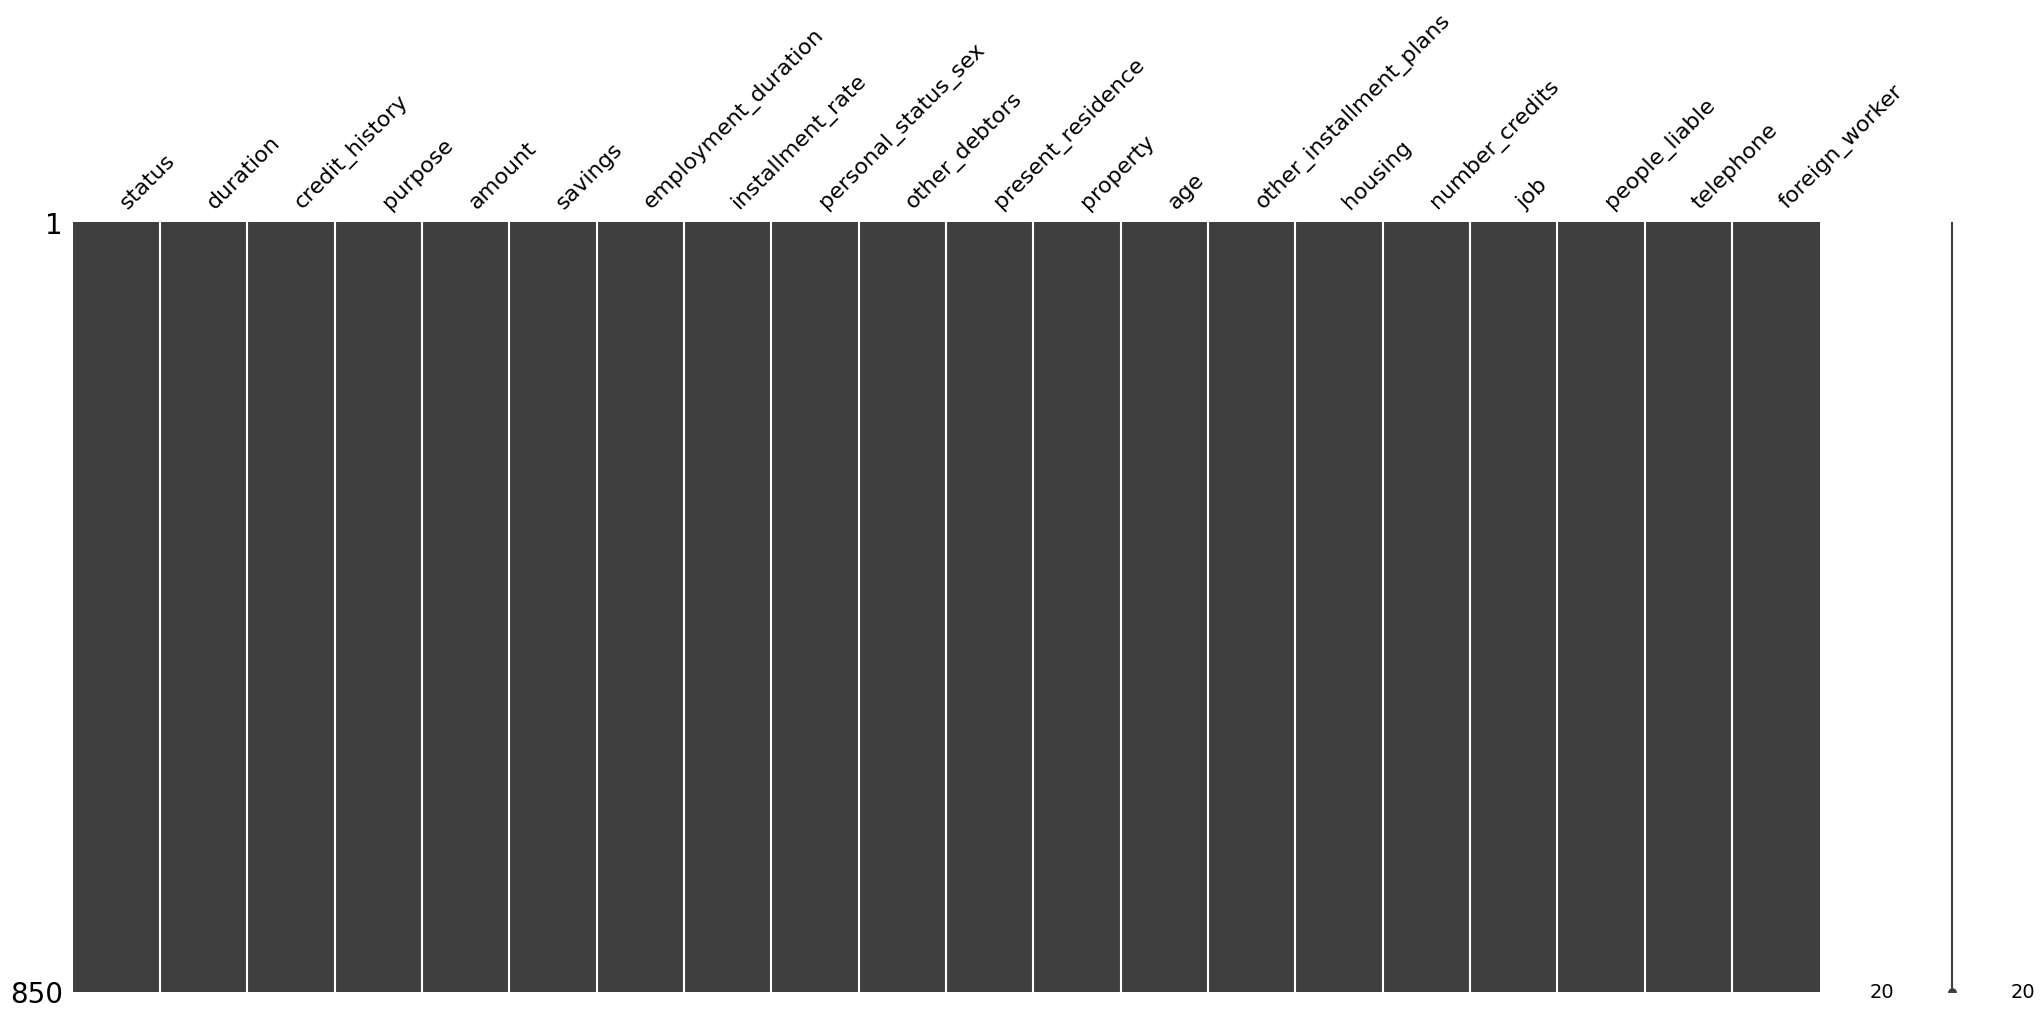

In [ ]:
#Revisión de datos faltantes
msno.matrix(X_train)


#### Justificación 
Para este punto se considera que no fue necesaria realizar de forma inmediata ningún tipo de imputación, quedando esto de forma independiente a que con posterioridad en la generación de otras funciones como los pipelines pueda generarse un Código preventivo atendiendo las buenas prácticas de programación. Esto debido a que se realizaron varios procedimientos de verificación de datos, enfocándonos únicamente en los datos de entrenamiento. Se utilizaron las funciones: isnull y isna, unique, las cuales nos permitieron descartar la existencia de datos nulos, de datos vacíos, así como de columnas vacías. Por estas validaciones se justifica que no se requiere por el momento realizar una imputación.

### Ejercicio 3.b 
Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.

In [ ]:
def plot_hist(X_train_data):
  #Tamaño de la figura
  sns.set(rc={'figure.figsize':(10,4)})
  len_col = len(X_train_data.columns)
  # ventana de 1x3 nichos para incluir en cada uno de ellos un gráfico.
  fig, axes = plt.subplots(1, len_col)
  for k in range(0,len_col):
    plt.subplot(1, len_col, k+1)
    # X_train_data.columns devuelve una lista con los nombres de las columnas.
    plt.hist(X_train_data[X_train_data.columns[k]], bins=20)
    plt.xlabel(X_train_data.columns[k])
  plt.show()

  X_train_data.describe()

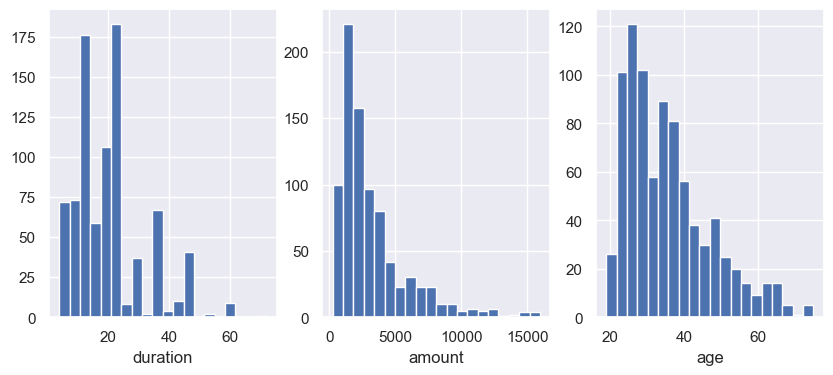

In [ ]:
#Copia de los features numéricos e impresión de la grafica de los datos del DataFrame
X_train_num = X_train[df_num].copy()
plot_hist(X_train_num)


In [ ]:
#Transformación y normalización de los datos númericos
X_train_num = X_train[df_num].copy()
df_num_pip = Pipeline(steps = [('sqrt', FunctionTransformer(np.log)), ('scalar', MinMaxScaler(feature_range=(0,1)))])
columnasTransformer = ColumnTransformer(transformers = [('numerical', df_num_pip, df_num)],
                                        remainder='passthrough')
XtrainFit = columnasTransformer.fit(X_train_num)
XtrainTransf = XtrainFit.transform(X_train_num)
XtrainTransf

array([[0.38009377, 0.33528822, 0.1067722 ],
       [0.61990623, 0.46786731, 0.17014311],
       [0.38009377, 0.27840164, 0.7471349 ],
       ...,
       [0.61990623, 0.5343615 , 0.6279626 ],
       [0.61990623, 0.72582523, 0.65963307],
       [0.58980236, 0.57039542, 0.54218051]])

In [ ]:
#Pasando el array que se arroja como resultado de la transformación y normalización a un DaatFrame
df_numb = pd.DataFrame(XtrainTransf, columns = ['duration','amount','age'])
df_numb

,duration,amount,age
0,0.380094,0.335288,0.106772
1,0.619906,0.467867,0.170143
2,0.380094,0.278402,0.747135
3,0.760188,0.570035,0.704697
4,0.760188,0.837992,0.332660
...,...,...,...
845,0.317015,0.446264,0.542181
846,0.380094,0.592307,0.255925
847,0.619906,0.534362,0.627963
848,0.619906,0.725825,0.659633


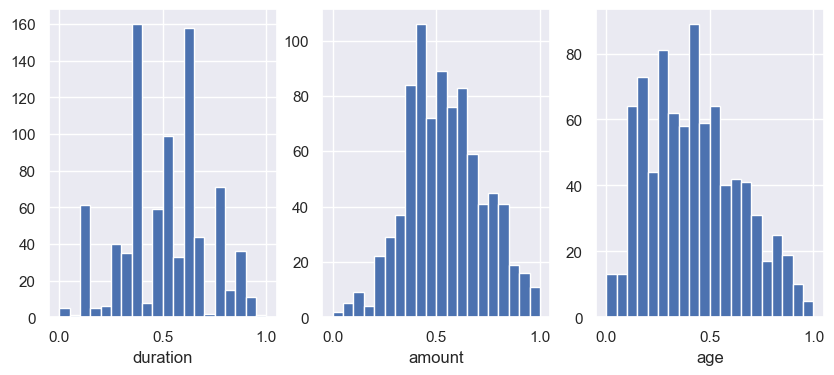

In [ ]:
#Impresión de la grafica de los datos del DataFrame númerico
plot_hist(df_numb)

### Ejercicio 3.c
Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y 
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique  la  transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar. 

In [ ]:
#Transformaciones a factores categóricos de entrada
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])

In [ ]:
#Transformaciones a factores categóricos de entrada
X_train_cat = X_train[df_cate].copy()
columnasTransformerCat = ColumnTransformer(transformers = [('catohe', catOHE_pipeline, df_cate)],
                                        remainder='passthrough')
XtrainFitCat = columnasTransformerCat.fit(X_train_cat)
XtrainTransfCat = XtrainFitCat.transform(X_train_cat)

In [ ]:
#Pasando el array que se arroja como resultado de la normalización a un DaatFrame
df_cat = pd.DataFrame(XtrainTransfCat.toarray())
df_cat

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
847,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
848,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
#Transformaciones a factores binarios de entrada
X_train_bin = X_train[df_bin].copy()
columnasTransformerBin = ColumnTransformer(transformers = [('catohe', catOHE_pipeline, df_bin)],
                                        remainder='passthrough')
XtrainFitBin = columnasTransformerBin.fit(X_train_bin)
XtrainTransfBin = XtrainFitBin.transform(X_train_bin)
XtrainTransfBin

array([[1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       ...,
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 0., 1.]])

In [ ]:
#Pasando el array que se arroja como resultado de la normalización a un DaatFrame
df_bin = pd.DataFrame(XtrainTransfBin)
df_bin

,0,1,2
0,1.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
845,0.0,0.0,0.0
846,1.0,0.0,1.0
847,1.0,0.0,1.0
848,1.0,1.0,1.0


# **Ejercicio 4**
Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características: 

- a.  Usa los parámetros predeterminados de cada modelo.

- b.  En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. 
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas).

- c.  Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.

- d.  Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la  métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta. 

- e.  En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de 
estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 

    - i.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del desempeño de dicha función “learning_curve()”.

    - ii.  Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.

    - iii.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo. 

In [ ]:
None

#**Ejercicio-5.**

Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así 
como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método 
GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores 
hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación 
cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas 
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también 
aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha 
seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. 
Puedes consultar su documentación de GridSearchCV en la siguiente liga:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  

a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores 
hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su 
búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso 
deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de 
parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la 
métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. 
NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son 
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la 
documentación. 

In [ ]:
None

b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” 
para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), 
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees 
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y 
evitar el sobreentrenamiento o el subentrenamiento. 

c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando 
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir 
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, 
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) 
“precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor 
del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de 
la métrica “precision”? Incluye tus conclusiones. 

d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” 
para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), 
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees 
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y 
evitar el sobreentrenamiento o el subentrenamiento. 


e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando 
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir 
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, 
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. 
Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor 
desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica 
“recall”? Incluye tus conclusiones.  

NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en 
llevar a cabo  

f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para 
el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), 
incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con 
al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres 
adecuados para mejorar el resultado y evitar el sobreentrenamiento o el 
subentrenamiento. 

#**Ejercicio-6.**

Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando 
el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te 
indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo 
de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para 
entrenamiento y validación:  

a. Obtener el  modelo de regresión logística con los mejores parámetros que hayas 
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye 
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final 
obtenido. 

In [ ]:
None

b. Obtener el  modelo de árbol de decisiones con los mejores parámetros que hayas 
encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e 
incluye tus conclusiones finales para este caso.  

c.   Obtener el  modelo de bosque aleatorio con los mejores parámetros que hayas 
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye 
tus conclusiones finales para este caso.  

###**Fin de la Actividad de la semana 6.**